In [2]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
stations = ['103 st (1)','103 st (6)','103 st-corona plza (7)','110 st (6)','111 st (7)','116 st (2/3)','116 st (6)',
            '116 st-columbia (1)','125 st (1)','125 st (2/3)','125 st (4/5/6)','135 st (2/3)','137 st-city clg (1)',
            '138 st-grand concourse (4/5)','14 st-7 av (1/2/3/F/L/M)','14 st-union sq (4/5/6/L/N/Q/R/W)','145 st (1)',
            '145 st (3)','149 st-grand concourse (2/4/5)','157 st (1)','161 st-yankee stdm (4/B/D)','167 st (4)',
            '168 st-broadway (1/A/C)','170 st (4)','174 st (2/5)','176 st (4)','18 st (1)','181 st (1)','183 st (4)',
            '191 st (1)','207 st (1)','215 st (1)','219 st (2/5)','225 st (2/5)','23 st (1)','23 st (6)','231 st (1)',
            '233 st (2/5)','238 st (1)','28 st (1)','28 st (6)','3 av-138 st (6)','3 av-149 st (2/5)','33 st (6)',
            '33 st-rawson st (7)','34 st-hudson yd (7)','34 st-penn sta (1/2/3/A/C/E)','40 st-lowery st (7)',
            '46 st-bliss st (7)','50 st (1)','51 st (6)','52 st-lincoln (7)','59 st (4/5/6/N/Q/R/W)',
            '59 st-columbus cr (1/A/B/C/D)','61 st-woodside (7)','66 st-lincoln ctr (1)','68 st-hunter clg (6)',
            '69 st-fisk av (7)','72 st (1/2/3)','74 st-broadway (4/5/6/N/L/Q/R)','77 st (6)','79 st (1)',
            '82 st-jackson hts (7)','86 st (1)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','baychester av (5)',
            'bedford pk blvd (4)','bergen st (2/3)','beverly rd (2/5)','bleeker st (6/D/F)',
            'borough hall-court st (2/3/4/5/R)','bowling green (4/5)','bronx pk east (2/5)','brook av (6)','brooklyn bridge-city hall (4/5/6/J/Z)',
            'buhre av (6)','burke av (2/5)','burnside av (4)','canal st (1)','canal st (6/J/N/Q/R)','castle hill av (6)','cathedral pkwy-110 st (1)','chambers st (1/2/3)',
            'christopher st (1)','church av (2/5)','clark st (2/3)','court sq (7)','crown hts-utica av (3/4)',
            'ctl park n-110 st (2/3)','cypress av (6)','dyckman st (1)','e 143 st (6)','e 149 st (6)','e 180 st (2/5)',
            'eastchester dyre av (5)','eastern pkwy (2/3)','elder av (6)','flatbush av-bk clg (2/5)','flushing-main st (7)',
            'fordham rd (4)','franklin av (2/3/4/5/S)','franklin st (1)','freeman st (2/5)','fulton st (2/3/4/5/A/C/J/Z)',
            'grand army plza (2/3)','grand ctl-42 st (4/5/6/7)','gun hill rd (2/5)','gun hill rd (5)','harlem-148 st (3)',
            'houston st (1)','hoyt st (2/3)','hunters pt (7)','hunts pt av (6)','intervale av (2/5)','jackson av (2/5)',
            'junction blvd (7)','junius st (3)','kingsbridge rd (4)','kingston av (3)','longwood av (6)',
            'marble hill-225 st (1)','mets-willets pt (7)','middletown rd (6)','morris pk (5)','morrison av (6)',
            'mosholu pkwy (4)','mt eden av (4)','nereid av (2/5)','nevins st (2/3/4/5)','new lots av (3)','newkirk av (2/5)',
            'nostrand av (3)','park place (2/3/A/C)','parkchester (6)','pelham bay pk (6)','pelham pkwy (2/5)',
            'pellham pkwy (5)','pennsylvania av (3)','president st (2/5)','prospect av (2/5)','queensboro plza (7/N/Q/W)',
            'rector st (1)','rockaway av (3)','saratoga av (3)','simpson st (2/5)','south ferry (1/R/W)','spring st (6)',
            'st lawrence av (6)','sterling st (2/5)','sutter av (3)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)',
            'van cortlandt park-242 st (1)','van siclen av (3)','vernon-jackson (7)','wakefield-241 st (2)','wall st (2/3)',
            'wall st (4/5)','west farm sq-e tremont (2/5)','westchester sq (6)','whitlock av (6)','winthrop st (2/5)',
            'woodlawn (4)','wtc-cortlandt st (1)','zerega av (6)']


In [3]:
not_in_csv = ['5 av (7)','canal st (6/J/N/Q/R)',]

In [4]:
stations_bx = ['van cortlandt park-242 st (1)','238 st (1)','231 st (1)','wakefield-241 st (2)','nereid av (2/5)',
              '233 st (2/5)','225 st (2/5)','219 st (2/5)','gun hill rd (2/5)','burke av (2/5)','allerton av (2/5)',
              'pelham pkwy (2/5)','bronx pk east (2/5)','e 180 st (2/5)','west farm sq-e tremont (2/5)','174 st (2/5)',
              'freeman st (2/5)','simpson st (2/5)','intervale av (2/5)','prospect av (2/5)','jackson av (2/5)',
              '3 av-149 st (2/5)','149 st-grand concourse (2/4/5)','woodlawn (4)','mosholu pkwy (4)','bedford pk blvd (4)',
              'kingsbridge rd (4)','fordham rd (4)','183 st (4)','burnside av (4)','176 st (4)','mt eden av (4)',
              '170 st (4)','167 st (4)','161 st-yankee stdm (4/B/D)','eastchester dyre av (5)','baychester av (5)',
              'gun hill rd (5)','pellham pkwy (5)','morris pk (5)','pelham bay pk (6)','buhre av (6)','middletown rd (6)',
              'westchester sq (6)','zerega av (6)','castle hill av (6)','parkchester (6)','st lawrence av (6)',
              'morrison av (6)','elder av (6)','whitlock av (6)','hunts pt av (6)','longwood av (6)','e 149 st (6)',
              'e 143 st (6)','cypress av (6)','brook av (6)','3 av-138 st (6)']

stations_bk = ['clark st (2/3)','borough hall-court st (2/3/4/5/R)','hoyt st (2/3)','nevins st (2/3/4/5)',
              'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','bergen st (2/3)','grand army plza (2/3)','eastern pkwy (2/3)',
               'franklin av (2/3/4/5/S)','president st (2/5)','sterling st (2/5)','winthrop st (2/5)','church av (2/5)',
               'beverly rd (2/5)','newkirk av (2/5)','flatbush av-bk clg (2/5)','nostrand av (3)','kingston av (3)',
              'crown hts-utica av (3/4)','sutter av (3)','saratoga av (3)','rockaway av (3)','junius st (3)',
              'pennsylvania av (3)','van siclen av (3)','new lots av (3)']

stations_manh = ['marble hill-225 st (1)','215 st (1)','207 st (1)','dyckman st (1)','191 st (1)','181 st (1)',
                '168 st-broadway (1/A/C)','157 st (1)','145 st (1)','137 st-city clg (1)','125 st (1)','116 st-columbia (1)',
                'cathedral pkwy-110 st (1)','103 st (1)','96 st (1/2/3)','86 st (1)','79 st (1)','72 st (1/2/3)',
                '66 st-lincoln ctr (1)','59 st-columbus cr (1/A/B/C/D)','50 st (1)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)',
                '34 st-penn sta (1/2/3/A/C/E)','28 st (1)','23 st (1)','18 st (1)','14 st-7 av (1/2/3/F/L/M)',
                 'christopher st (1)','houston st (1)','canal st (1)','franklin st (1)','chambers st (1/2/3)',
                 'wtc-cortlandt st (1)','rector st (1)','south ferry (1/R/W)','135 st (2/3)','125 st (1)','116 st (2/3)',
                'ctl park n-110 st (2/3)','park place (2/3/A/C)','fulton st (2/3/4/5/A/C/J/Z)','wall st (2/3)',
                'harlem-148 st (3)','145 st (3)','125 st (4/5/6)','86 st (4/5/6)','59 st (4/5/6/N/R/W)',
                'grand ctl-42 st (4/5/6/7)','14 st-union sq (4/5/6/L/N/Q/R/W)','brooklyn bridge-city hall (4/5/6/J/Z)',
                'wall st (4/5)','bowling green (4/5)','116 st (6)','110 st (6)','103 st (6)','96 st (6)','77 st (6)',
                '68 st-hunter clg (6)','51 st (6)','33 st (6)','28 st (6)','astor pl (6)','bleeker st (6/D/F)',
                 '34 st-hudson yd (7)']

stations_qns = ['flushing-main st (7)','mets-willets pt (7)','111 st (7)','103 st-corona plza (7)','junction blvd (7)',
               '90 st-elmhurst (7)', '82 st-jackson hts (7)','74 st-broadway (4/5/6/N/L/Q/R)','69 st-fisk av (7)',
               '61 st-woodside (7)','52 st-lincoln (7)','46 st-bliss st (7)','40 st-lowery st (7)','33 st-rawson st (7)',
               'queensboro plza (7/N/Q/W)','court sq (7)','hunters pt (7)','vernon-jackson (7)']

In [5]:
stations_outside = ['van cortlandt park-242 st (1)','238 st (1)','231 st (1)','marble hill-225 st (1)',
                   '215 st (1)','207 st (1)','dyckman st (1)','wakefield-241 st (2)','nereid av (2/5)',
                   '233 st (2/5)','225 st (2/5)','219 st (2/5)','gun hill rd (2/5)','burke av (2/5)','allerton av (2/5)',
                   'pelham pkwy (2/5)','bronx pk east (2/5)','e 180 st (2/5)','west farm sq-e tremont (2/5)','174 st (2/5)',
                   'freeman st (2/5)','simpson st (2/5)','intervale av (2/5)','prospect av (2/5)','jackson av (2/5)',
                   'sutter av (3)','saratoga av (3)','rockaway av (3)','junius st (3)','pennsylvania av (3)',
                   'van siclen av (3)','new lots av (3)','woodlawn (4)','mosholu pkwy (4)','bedford pk blvd (4)',
                   'kingsbridge rd (4)','fordham rd (4)','183 st (4)','burnside av (4)','176 st (4)','mt eden av (4)',
                   '170 st (4)','167 st (4)','161 st-yankee stdm (4/B/D)','eastchester dyre av (5)','baychester av (5)',
                   'gun hill rd (5)','pellham pkwy (5)','morris pk (5)','pelham bay pk (6)','buhre av (6)','middletown rd (6)',
                   'westchester sq (6)','zerega av (6)','castle hill av (6)','parkchester (6)','st lawrence av (6)',
                   'morrison av (6)','elder av (6)','whitlock av (6)','mets-willets pt (7)','111 st (7)',
                   '103 st-corona plza (7)','90 st-elmhurst (7)', '82 st-jackson hts (7)','69 st-fisk av (7)',
                   '61 st-woodside (7)','52 st-lincoln (7)','46 st-bliss st (7)','40 st-lowery st (7)','33 st-rawson st (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)']

stations_express = ['96 st (1/2/3)','72 st (1/2/3)','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)','34 st-penn sta (1/2/3/A/C/E)',
                   '14 st-7 av (1/2/3/F/L/M)','chambers st (1/2/3)','3 av-149 st (2/5)','149 st-grand concourse (2/4/5)',
                   'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
                   'franklin av (2/3/4/5/S)','crown hts-utica av (3/4)','125 st (4/5/6)','86 st (4/5/6)','59 st (4/5/6/N/R/W)',
                   'grand ctl-42 st (4/5/6/7)','14 st-union sq (4/5/6/L/N/Q/R/W)','brooklyn bridge-city hall (4/5/6/J/Z)',
                   'fulton st (2/3/4/5/A/C/J/Z)','wall st (4/5)','bowling green (4/5)','parkchester (6)','hunts pt av (6)',
                   '3 av-138 st (6)','flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','61 st-woodside (7)',
                   'queensboro plza (7/N/Q/W)','court sq (7)','hunters pt (7)','vernon-jackson (7)',]

stations_ada = ['231 st (1)','dyckman st (1)','96 st (1/2/3)','66 st-lincoln ctr (1)','59 st-columbus cr (1/A/B/C/D)',
               'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S/W)','34 st-penn sta (1/2/3/A/C/E)','chambers st (1/2/3)',
               'wtc-cortlandt st (1)','south ferry (1/R/W)','233 st (2/5)','gun hill rd (2/5)','e 180 st (2/5)',
               'simpson st (2/5)','3 av-149 st (2/5)','135 st (2/3)','fulton st (2/3/4/5/A/C/J/Z)',
               'borough hall-court st (2/3/4/5/R)','atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)','eastern pkwy (2/3)',
               'church av (2/5)','flatbush av-bk clg (2/5)','crown hts-utica av (3/4)','fordham rd (4)',
               '161 st-yankee stdm (4/B/D)','125 st (4/5/6)','86 st (4/5/6)','grand ctl-42 st (4/5/6/7)',
               'brooklyn bridge-city hall (4/5/6/J/Z)','bowling green (4/5)','gun hill rd (5)','pelham bay pk (6)',
               'hunts pt av (6)','51 st (6)','28 st (6)','bleeker st (6/D/F)','canal st (6/J/N/Q/R)',
               'flushing-main st (7)','mets-willets pt (7)','junction blvd (7)','74 st-broadway (4/5/6/N/L/Q/R)',
               '69 st-fisk av (7)','61 st-woodside (7)','court sq (7)',]

stations_terminal = ['van cortlandt park-242 st (1)','south ferry (1/R/W)','wakefield-241 st (2)','flatbush av-bk clg (2/5)',
                    'harlem-148 st (3)','new lots av (3)','woodlawn (4)','crown hts-utica av (3/4)','eastchester dyre av (5)',
                    'pelham bay pk (6)','brooklyn bridge-city hall (4/5/6/J/Z)','flushing-main st (7)',]

In [5]:
ent = pd.read_csv('data/turnstile/entries.csv')
ext = pd.read_csv('data/turnstile/exits.csv')

In [6]:
ent['date'] = pd.to_datetime(ent['date'])
ent.set_index('date',inplace=True)

ext['date'] = pd.to_datetime(ext['date'])
ext.set_index('date',inplace=True)

ParserError: Unknown string format: 2014-total

In [8]:
ts_down = pd.to_datetime('2015-01-01')
ts_up = pd.to_datetime('2020-01-01')
stamp = pd.date_range(start=ts_down,end=ts_up)

In [9]:
ent = ent.loc[(ent.index >= stamp[0]) & (ent.index < stamp[-1])]
ext = ext.loc[(ext.index >= stamp[0]) & (ext.index < stamp[-1])]

In [16]:
ent

,queensboro plza (7/N/Q/W),park place (2/3/A/C),south ferry (1/R/W),103 st (1),116 st-columbia (1),125 st (1),137 st-city clg (1),145 st (1),157 st (1),18 st (1),...,170 st (4),176 st (4),183 st (4),bedford pk blvd (4),burnside av (4),fordham rd (4),kingsbridge rd (4),mosholu pkwy (4),mt eden av (4),woodlawn (4)
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,6280346744,17271669437,5763690301,11192517435,9.806005e+09,2.533963e+09,1.220000e+11,1.080000e+11,5256700303,3688017995,...,2.673645e+09,8366994302,3.330000e+11,1728539741,2.551198e+09,2.360044e+10,5809492737,5025217726,2190349651,4654284688
2015-02-01,5845280847,15248712086,5255001976,10400060066,8.928571e+09,2.269467e+09,1.100000e+11,1.220000e+11,4803287171,3310166507,...,2.415018e+09,7380942166,3.000000e+11,1552403320,2.246716e+09,2.107294e+10,5328516453,4402873247,2001902128,4191425068
2015-03-01,6362450711,16418129784,5875387482,11265070192,9.895536e+09,2.564659e+09,1.230000e+11,2.520000e+11,5343463985,3706317374,...,2.777761e+09,2784606292,3.330000e+11,1738698582,2.624415e+09,2.311417e+10,5811573201,4926787027,2243648571,4647917950
2015-04-01,6237343965,15991755050,5736904704,10906855088,9.588770e+09,2.534694e+09,1.180000e+11,2.460000e+11,5243322285,3648427241,...,2.722502e+09,1861036046,3.200000e+11,1721254137,2.515249e+09,2.280234e+10,5674074083,4812400715,2199598044,4534857940
2015-05-01,6326306323,16809952278,6020541316,11377175344,2.260000e+11,2.673767e+09,1.300000e+11,2.550000e+11,4974413988,27270700954,...,2.816665e+09,1981398595,3.330000e+11,1800672384,2.647609e+09,2.334350e+10,5946204134,5342987510,2315341358,4776900699
2015-06-01,6215525944,16026824115,5894075269,11095424546,2.180000e+11,2.615264e+09,1.170000e+11,2.480000e+11,5316514386,39811065614,...,2.772987e+09,1932601497,3.200000e+11,1782166171,2.631277e+09,2.255008e+10,5773924381,4901348263,2295487081,4663635308
2015-07-01,6529745078,16578703010,6163893028,11715175849,2.310000e+11,2.712796e+09,1.240000e+11,2.560000e+11,5693726321,41227965822,...,2.912460e+09,2027550494,3.330000e+11,1868634333,2.802357e+09,2.336345e+10,6013433331,5139527721,2374603950,4805868435
2015-08-01,6536623213,16685656082,6237259430,11520060163,2.460000e+11,2.766968e+09,1.240000e+11,2.560000e+11,5594973796,41219289195,...,2.959269e+09,2057627366,3.330000e+11,1894054175,2.841741e+09,2.342464e+10,6059956806,5212452682,2403501783,4820575327
2015-09-01,6417158952,16433953702,6091399743,11677957217,2.280000e+11,2.668576e+09,1.180000e+11,2.500000e+11,5534814714,40246693500,...,2.907331e+09,2042056964,3.240000e+11,1879955058,2.851433e+09,2.272681e+10,6106519248,5225643717,2331083989,4856707319


In [10]:
manh_ent = ent[stations_manh]
manh_medians = manh_ent.median(axis=0).sort_values(ascending=False)
manh_ent['manh median'] = manh_ent.median(axis=1)
manh_top_5_ent = list(manh_medians[:5].index)
manh_5_ent = manh_ent[manh_top_5_ent]
manh_5_ent = manh_5_ent.join(manh_ent['manh median'])
warnings.filterwarnings('ignore')

<ipython-input-10-7e16237dd052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manh_ent['manh median'] = manh_ent.median(axis=1)


In [11]:
manh_ext = ext[stations_manh]
manh_medians = manh_ext.median(axis=0).sort_values(ascending=False)
manh_ext['manh median'] = manh_ext.median(axis=1)
manh_top_5_ext = list(manh_medians[:5].index)
manh_5_ext = manh_ent[manh_top_5_ext]
manh_5_ext = manh_5_ext.join(manh_ext['manh median'])
warnings.filterwarnings('ignore')

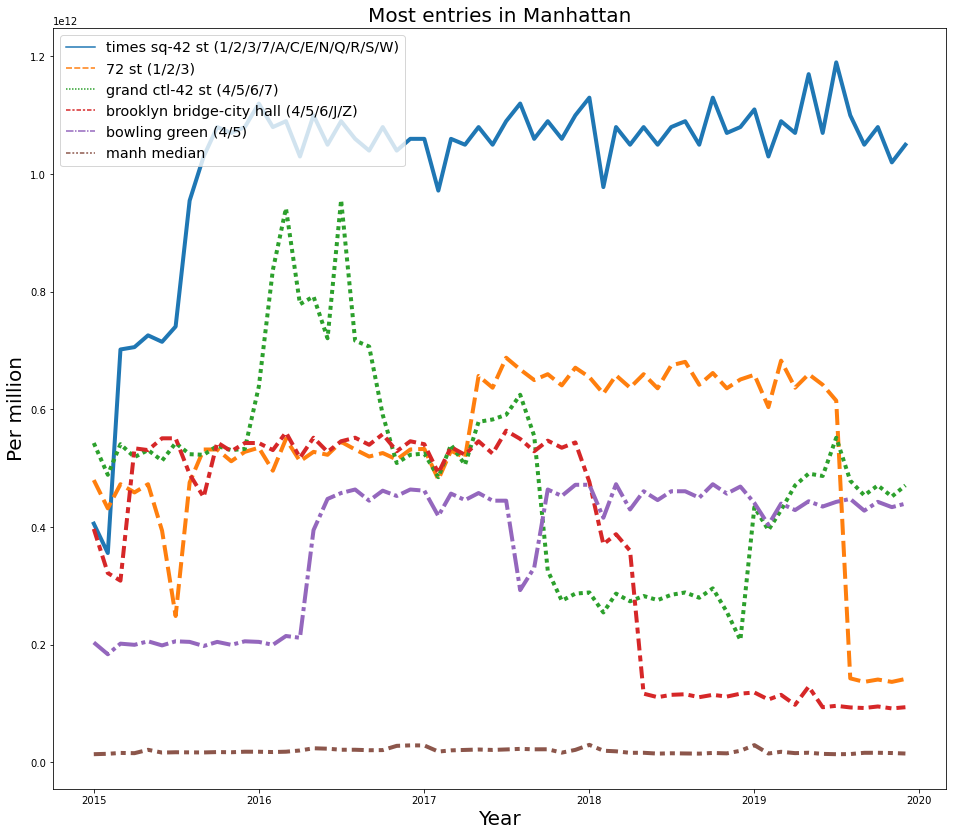

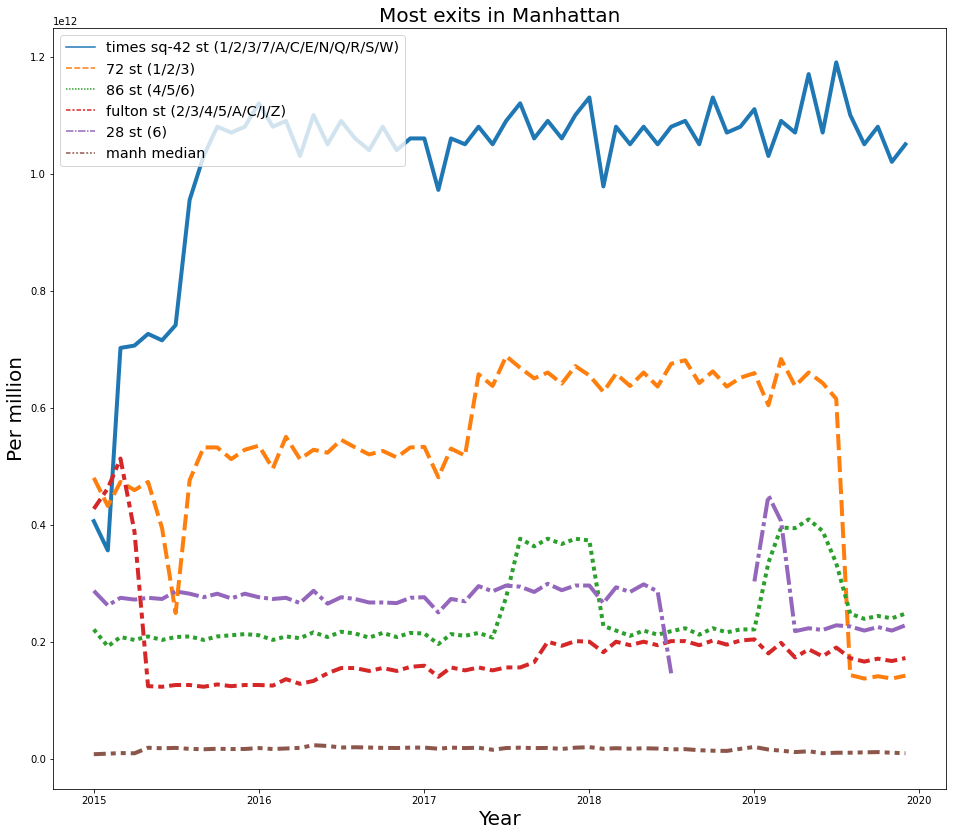

In [12]:
fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=manh_5_ent, linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most entries in Manhattan',fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=manh_5_ext,linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most exits in Manhattan',fontsize=20)
plt.show();

In [13]:
bk_ent_df = ent[stations_bk]
bk_medians = bk_ent_df.median(axis=0).sort_values(ascending=False)
bk_ent_df['bk median'] = bk_ent_df.median(axis=1)
bk_top_5_ent = list(bk_medians[:5].index)
bk_5_ent = bk_ent_df[bk_top_5_ent]
bk_5_ent = bk_5_ent.join(bk_ent_df['bk median'])
warnings.filterwarnings('ignore')

In [14]:
bk_ext_df = ext[stations_bk]
bk_medians = bk_ext_df.median(axis=0).sort_values(ascending=False)
bk_ext_df['bk median'] = bk_ext_df.median(axis=1)
bk_top_5_ext = list(bk_medians[:5].index)
bk_5_ext = bk_ext_df[bk_top_5_ext]
bk_5_ext = bk_5_ext.join(bk_ext_df['bk median'])
warnings.filterwarnings('ignore')

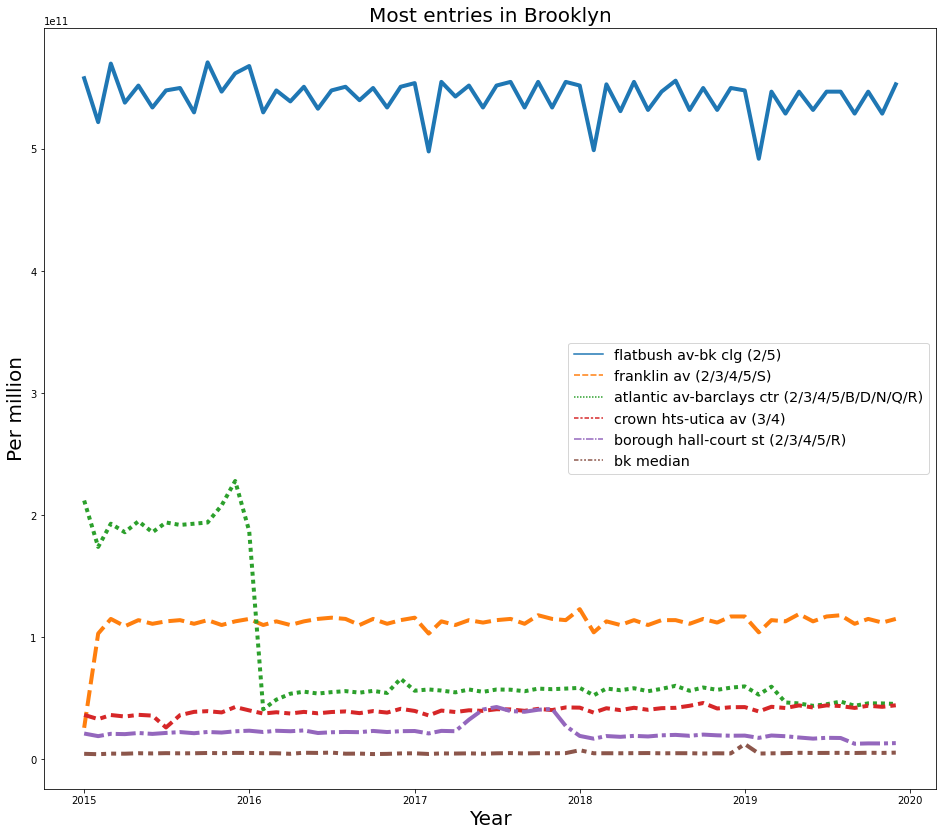

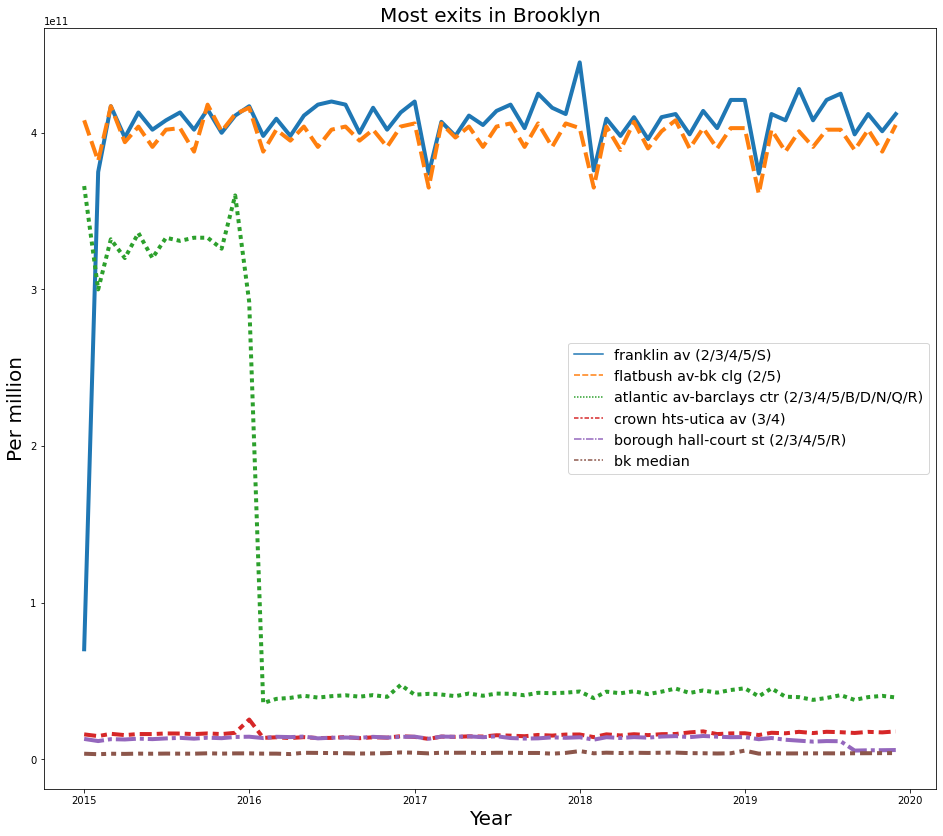

In [15]:
fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=bk_5_ent, linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most entries in Brooklyn',fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(16,14))
sns.lineplot(data=bk_5_ext,linewidth=4)
ax.legend(fontsize='x-large')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Per million',fontsize=20)
ax.set_title('Most exits in Brooklyn',fontsize=20)
plt.show();